In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
np.random.seed(10)
data = 2.4*np.random.rand(128)

# Create the histogram
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
plt.hist(data, bins=30, color='tab:purple', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Activation Mean', fontsize=16)
plt.xlabel('Mean value of Activation', fontsize=14)
plt.ylabel('Frequency of Activation', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (optional)
# plt.legend(['Data'])

# Customize tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a horizontal line at y=0 (optional)
plt.axhline(0, color='black',linewidth=0.5)

# Save the figure (optional)
# plt.savefig('histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [56]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.io import read_image
from torchvision import transforms
# Load a pre-trained ResNet model

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

resnet_model = models.resnet152(pretrained=True)
resnet_model = resnet_model.to(DEVICE)
resnet_model.eval()
img_drone_clean = read_image('drone-clean.png')[:3].float()#.convert("RGB")
img_drone_fog = read_image('drone-fog.png')[:3].float()#.convert("RGB")

img_drone_clean = img_drone_clean/255.0
img_drone_fog = img_drone_fog/255.0

#normlayer_names = []
# Print the named modules
#for name, module in resnet_model.named_modules():
#    if isinstance(module, nn.BatchNorm2d):
#        normlayer_names.append(name)
transform = transforms.Compose(
    [#transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
     transforms.CenterCrop(size=(256,256))
])
img_drone_clean = transform(img_drone_clean)
img_drone_fog = transform(img_drone_fog)

In [85]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.io import read_image
from torchvision import transforms
# Load a pre-trained ResNet model

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

#resnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
resnet_model = models.resnet152(pretrained=True)
resnet_model = resnet_model.to(DEVICE)
resnet_model.eval()
img_drone_clean = read_image('File.jpg')[:3].float()#.convert("RGB")
img_drone_fog = read_image('drone-fog.png')[:3].float()#.convert("RGB")

img_drone_clean = img_drone_clean/255.0
#img_drone_fog = img_drone_fog/255.0

#normlayer_names = []
# Print the named modules
#for name, module in resnet_model.named_modules():
#    if isinstance(module, nn.BatchNorm2d):
#        normlayer_names.append(name)
transform = transforms.Compose(
    [#transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
     transforms.Resize(size=(256,256))
])
img_drone_clean = transform(img_drone_clean)
img_drone_fog = transform(img_drone_fog)

/home/client1/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/client1/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/client1/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Te

In [86]:
print(img_drone_clean[:3].shape)
print(img_drone_fog[:3].shape)
img_drone_clean = img_drone_clean.to(DEVICE)
img_drone_fog = img_drone_fog.to(DEVICE)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


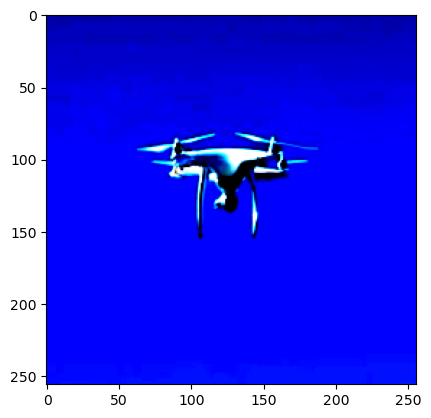

In [73]:
import matplotlib.pyplot as plt
img_drone_clean = img_drone_clean.numpy().transpose(1, 2, 0)
plt.imshow(img_drone_clean)
plt.show()

In [87]:
in_labels= "imagenet1000_clsidx_to_labels.txt"
imagenetLabels = dict(enumerate(open(in_labels)))
logits = resnet_model(img_drone_clean.unsqueeze(0))
probabilities = nn.Softmax(dim=-1)(logits)
sortedProba = torch.argsort(probabilities, dim=-1, descending=True)
for (i, idx) in enumerate(sortedProba[0, :5]):
	print("{}. {}: {:.2f}%".format
		(i, imagenetLabels[idx.item()].strip(),
		probabilities[0, idx.item()] * 100))


0. 895: 'warplane, military plane',: 52.54%
1. 146: 'albatross, mollymawk',: 8.47%
2. 404: 'airliner',: 4.61%
3. 744: 'projectile, missile',: 3.23%
4. 4: 'hammerhead, hammerhead shark',: 2.49%


In [78]:
in_labels= "imagenet1000_clsidx_to_labels.txt"
imagenetLabels = dict(enumerate(open(in_labels)))
logits = resnet_model(img_drone_fog.unsqueeze(0))
probabilities = nn.Softmax(dim=-1)(logits)
sortedProba = torch.argsort(probabilities, dim=-1, descending=True)
for (i, idx) in enumerate(sortedProba[0, :5]):
	print("{}. {}: {:.2f}%".format
		(i, imagenetLabels[idx.item()].strip(),
		probabilities[0, idx.item()] * 100))


0. 561: 'forklift',: 99.88%
1. 783: 'screw',: 0.06%
2. 644: 'matchstick',: 0.04%
3. 754: 'radio, wireless',: 0.01%
4. 966: 'red wine',: 0.00%


In [11]:
def get_named_submodule(model, sub_name: str):
    names = sub_name.split(".")
    module = model
    for name in names:
        module = getattr(module, name)

    return module

In [29]:
get_named_submodule(resnet_model, normlayer_names[1])

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [31]:
names = normlayer_names[1].split(".")
module = resnet_model
for name in names:
    module = getattr(module, name)
print(module)

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


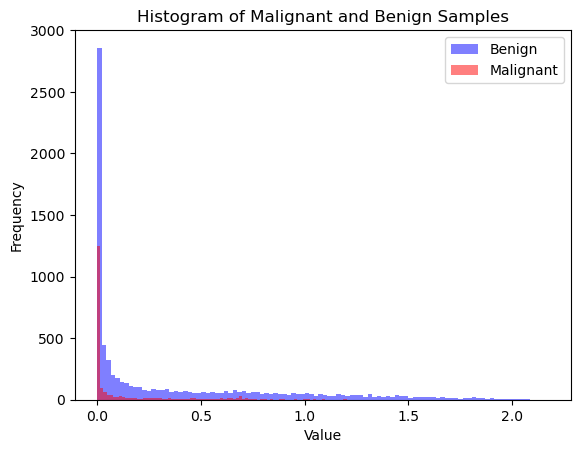

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign.npy')
data2 = np.load('entropy_mal.npy')

# Define the number of bins
bins = 100

# Plot the histograms
plt.hist(data1, bins=bins, alpha=0.5, label='Benign', color='blue')
plt.hist(data2, bins=bins, alpha=0.5, label='Malignant', color='red')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Malignant and Benign Samples')
plt.legend(loc='upper right')

# Show the plot
plt.show()

2.1736405


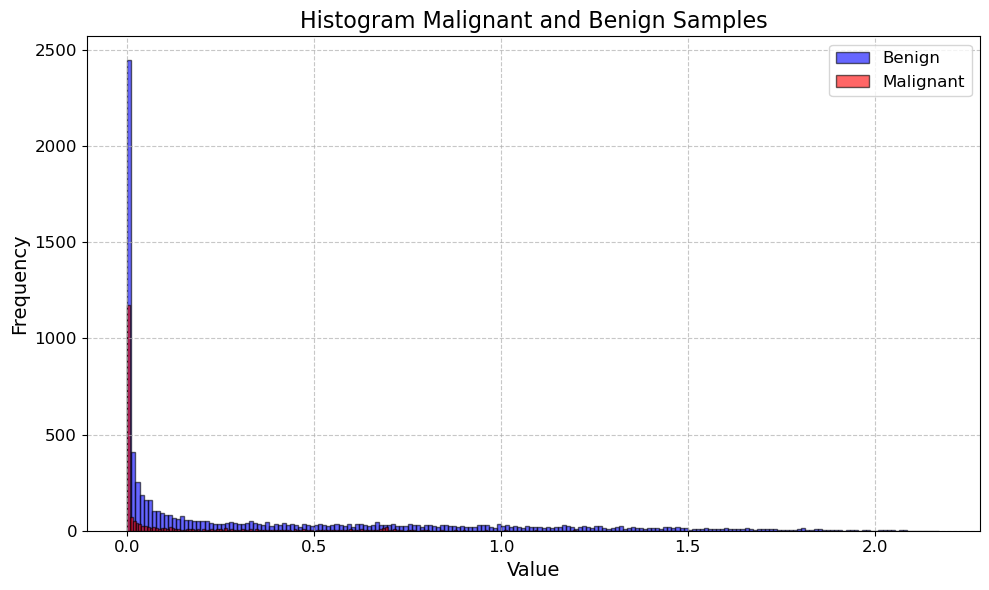

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign.npy')
data2 = np.load('entropy_mal.npy')
print(data1.max())

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


2.276317


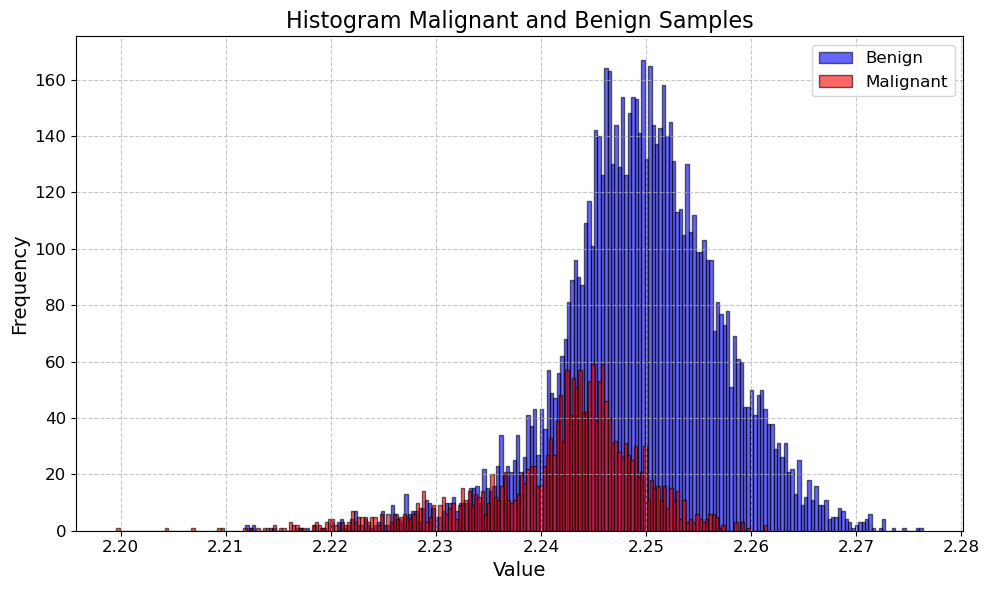

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_1.npy')
data2 = np.load('entropy_mal_1.npy')
print(data1.max())

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


2.272288


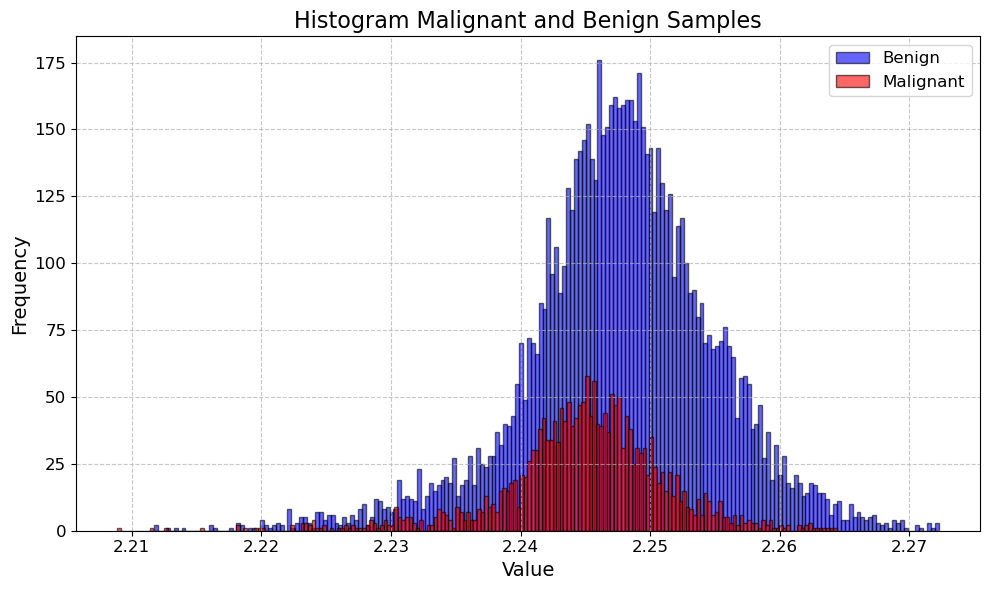

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_2.npy')
data2 = np.load('entropy_mal_2.npy')
print(data1.max())

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


2.2472358


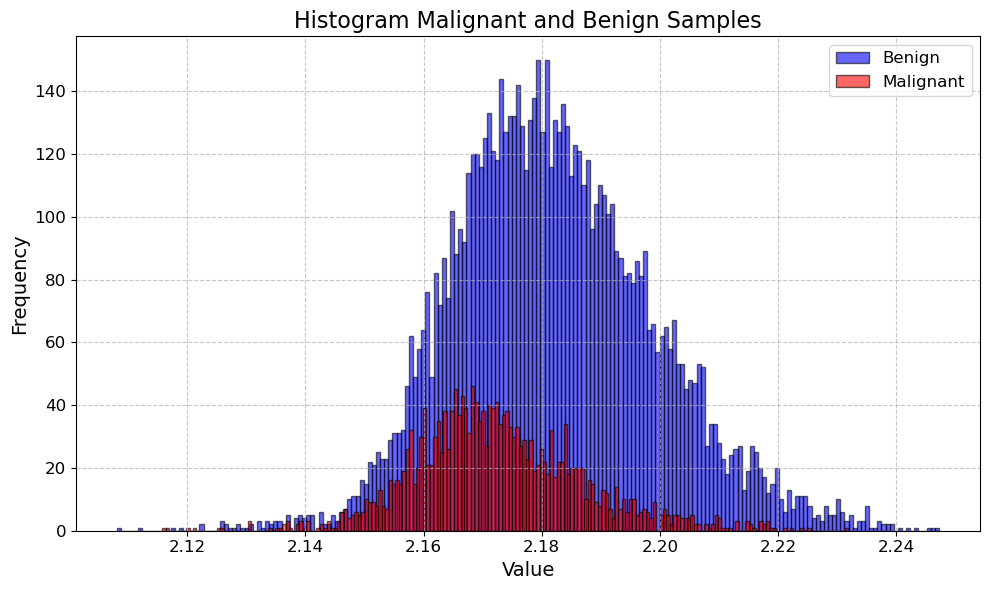

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_3.npy')
data2 = np.load('entropy_mal_3.npy')
print(data1.max())

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


(7956, 1)
(2028, 1)


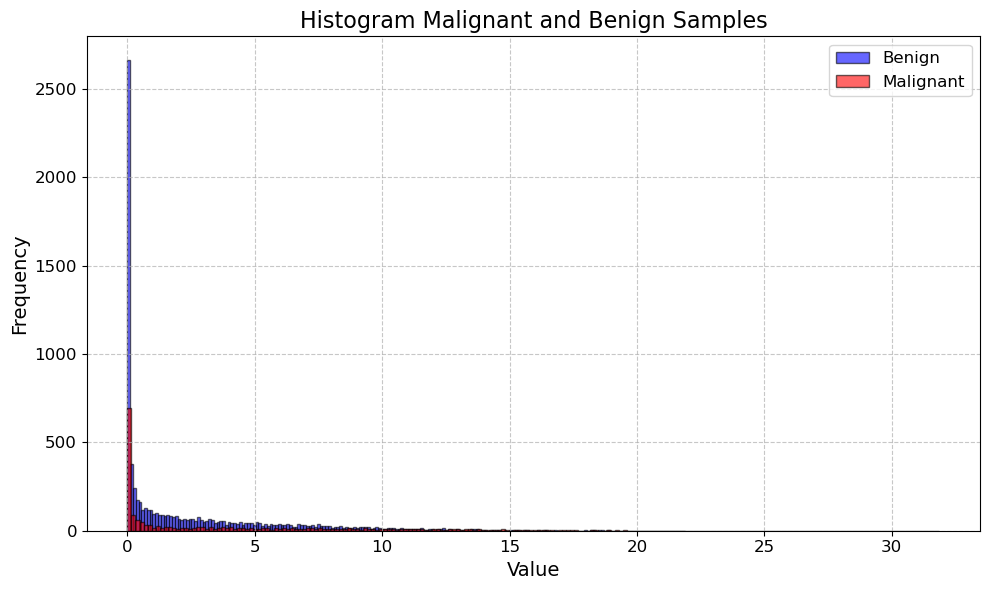

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_10.npy')
data2 = np.load('entropy_mal_10.npy')
print(data1.shape)
print(data2.shape)

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


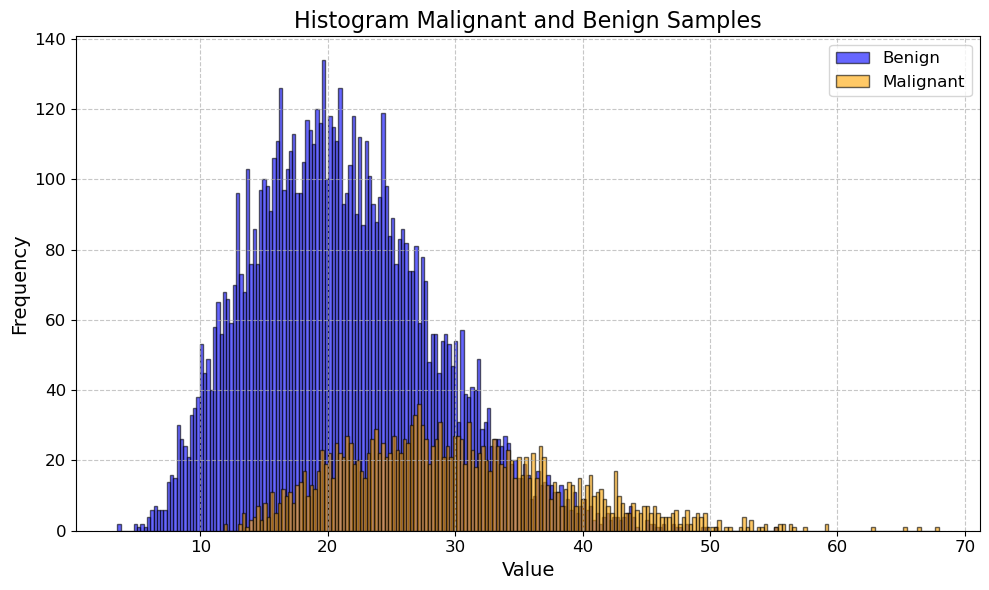

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_11.npy')
data2 = np.load('entropy_mal_11.npy')

data2 = data2 + 5.77

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='orange', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


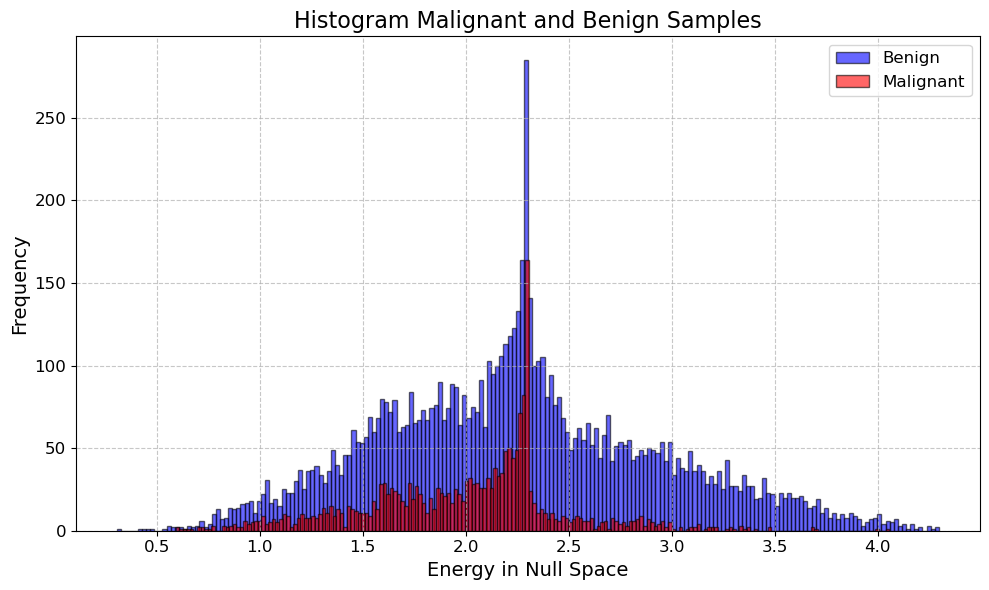

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_diff_1.npy')
data2 = np.load('entropy_mal_diff_1.npy')

data1 = data1 + 2.3
data2 = data2 + 2.3

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Energy in Null Space', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


(7956,)
(2044,)


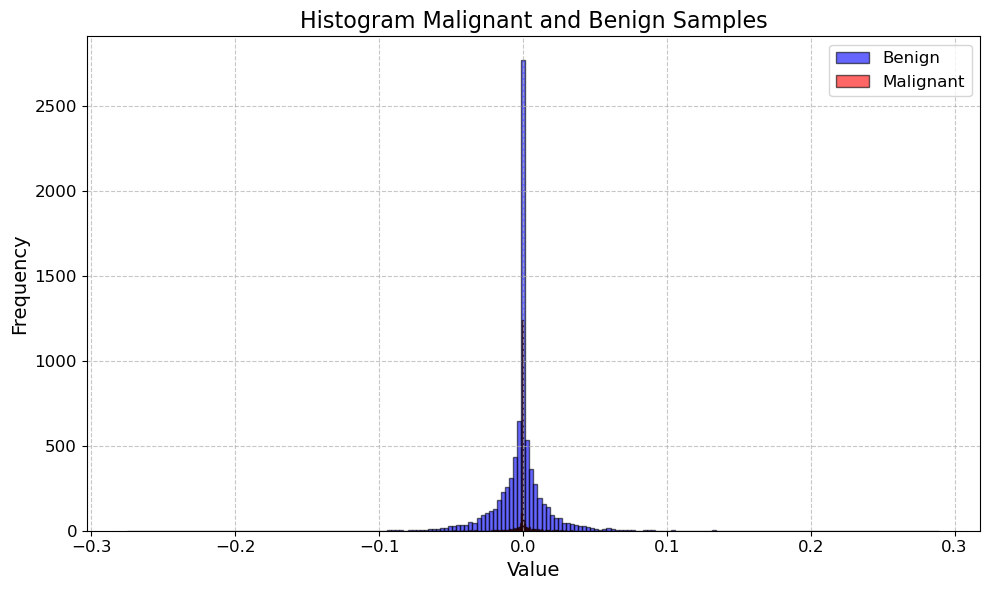

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('entropy_benign_diff_2.npy')
data2 = np.load('entropy_mal_diff_2.npy')
print(data1.shape)
print(data2.shape)

# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


(7140, 1280)
(1820, 1280)


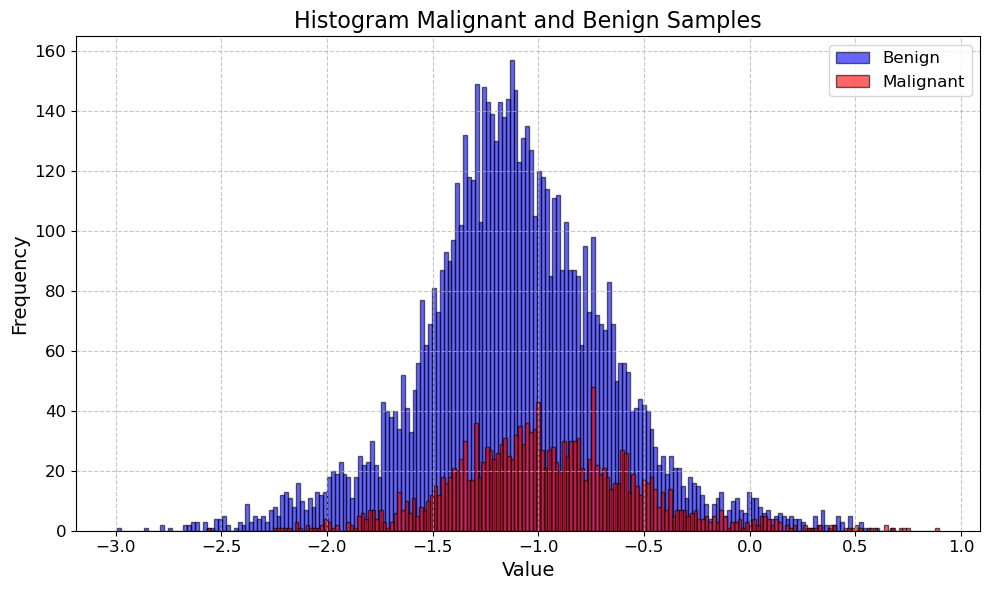

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('score_benign.npy')
data2 = np.load('score_mal.npy')
print(data1.shape)
print(data2.shape)
data1 = np.mean(data1, axis=1)
data2 = np.mean(data2, axis=1)
# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


[0.00223541 0.00161648 0.00126839 ... 0.00133038 0.00106907 0.00199127]
[ 4.7779083e-04  2.2125244e-04  1.2836456e-03  2.0484924e-03
  2.6845932e-03  1.1835098e-03  1.3589859e-03  6.0558319e-04
  1.1882782e-03  1.9817352e-03  1.0318756e-03  1.2292862e-03
  1.5439987e-03  2.7160645e-03  1.7671585e-03  1.6555786e-03
  7.3909760e-04  1.9702911e-03  6.3419342e-04  1.1663437e-03
  1.6965866e-03  4.4250488e-04  2.0217896e-03  2.5558472e-03
  1.8606186e-03  1.5096664e-03  1.1348724e-03  2.3307800e-03
  1.9168854e-03  7.3909760e-04  1.7204285e-03  1.6479492e-03
  1.6775131e-03  1.5220642e-03  2.2821426e-03  1.8968582e-03
  1.9226074e-03  6.6184998e-04  1.7557144e-03 -3.6239624e-05
  5.9127808e-04  1.9588470e-03  1.9321442e-03  9.3460083e-04
  2.1696091e-03  1.6164780e-03  2.1772385e-03  1.2645721e-03
  4.4155121e-04  1.7518997e-03  1.7471313e-03  1.1529922e-03
  1.2054443e-03  2.4204254e-03  2.0160675e-03  2.2993088e-03
  9.6702576e-04  1.0938644e-03  2.2344589e-03  1.0118484e-03
  1.9903183e-

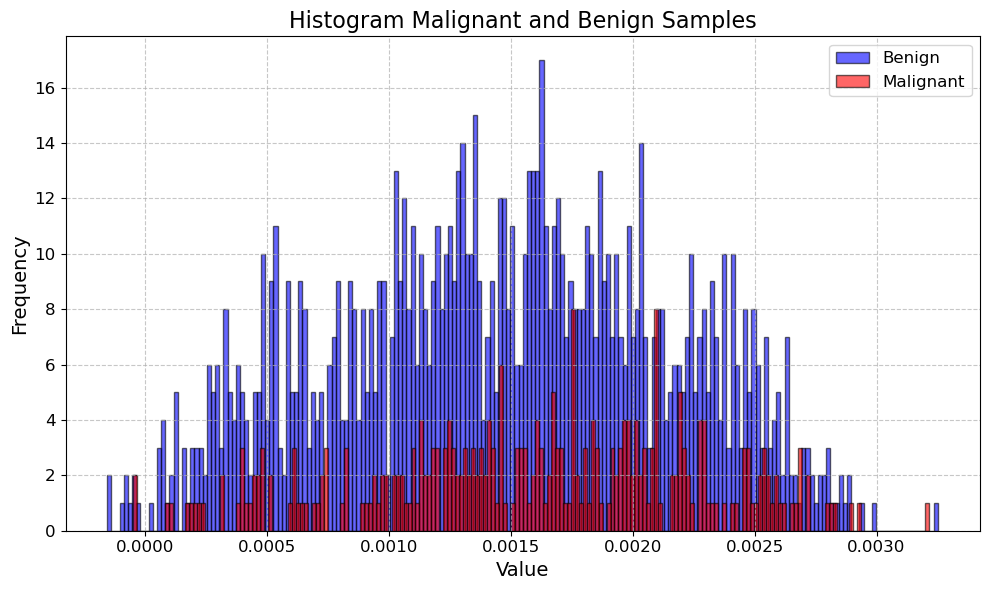

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('score_benign_3.npy')
data2 = np.load('score_mal_3.npy')
print(data1)
print(data2)
# data1 = np.mean(data1, axis=1)
# data2 = np.mean(data2, axis=1)
# Define the number of bins
bins = 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', color='red', edgecolor='black')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import torch
x = torch.randn(128,10)
a = torch.arange(10)
y = torch.zeros(128)
print(a.shape)
labels = torch.randint(0,9,size=(128,))
print((x[3,labels[3] == a]))
print((x[3,labels[3] != a]).sum())
print(x[3,labels[k]==a]/(x[3,labels[3]!=a].sum()))
for k in range(128):
    y[k] = x[k,labels[k]==a]/(x[k,labels[k]!=a].sum())
print(y)

mask = labels.unsqueeze(1) == a.unsqueeze(0)
y1 = (x*mask).sum(dim=1)/(x*~mask).sum(dim=1)
print(y1)
print(y==y1)

(1224, 64)
(312, 64)


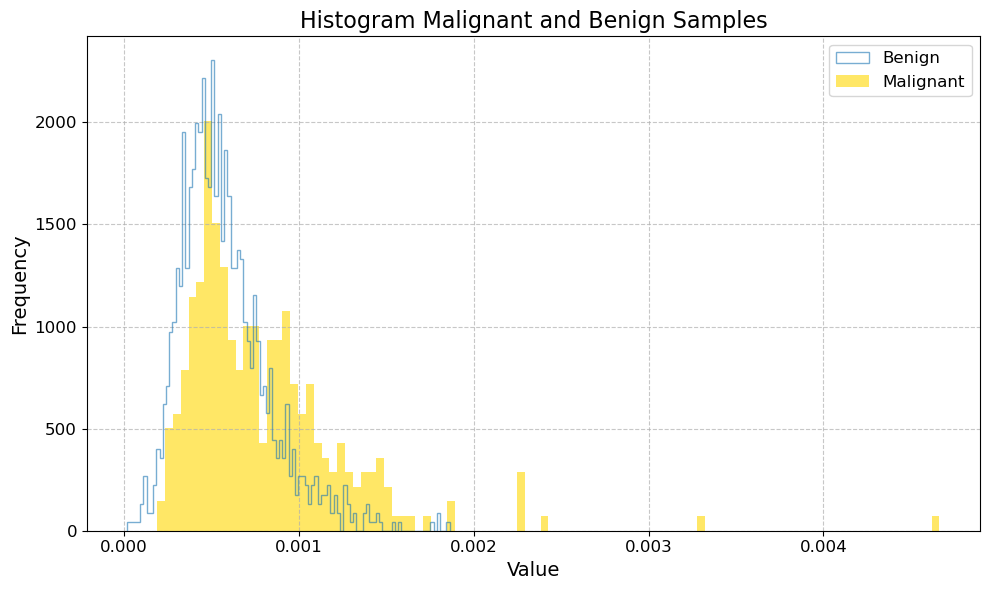

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
data1 = np.load('var_act.npy')
data2 = np.load('var_act_victim.npy')
print(data1.shape)
print(data2.shape)
channel = 42
data1 = np.mean(data1, axis=1)
data2 = np.mean(data2, axis=1)
# data1 = np.mean(data1, axis=1)
# data2 = np.mean(data2, axis=1)
# Define the number of bins
bins = 100

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histograms
ax.hist(data1, bins=bins, alpha=0.6, label='Benign', histtype='step', density=True, facecolor='b')
ax.hist(data2, bins=bins, alpha=0.6, label='Malignant', density=True,  color='gold')

# Add labels and title
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Histogram Malignant and Benign Samples', fontsize=16)

# Add a legend
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set ticks parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Tight layout to prevent clipping
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('histogram_plot.png', dpi=300)

# Show the plot
plt.show()


[1. 1. 1. ... 0. 0. 0.]


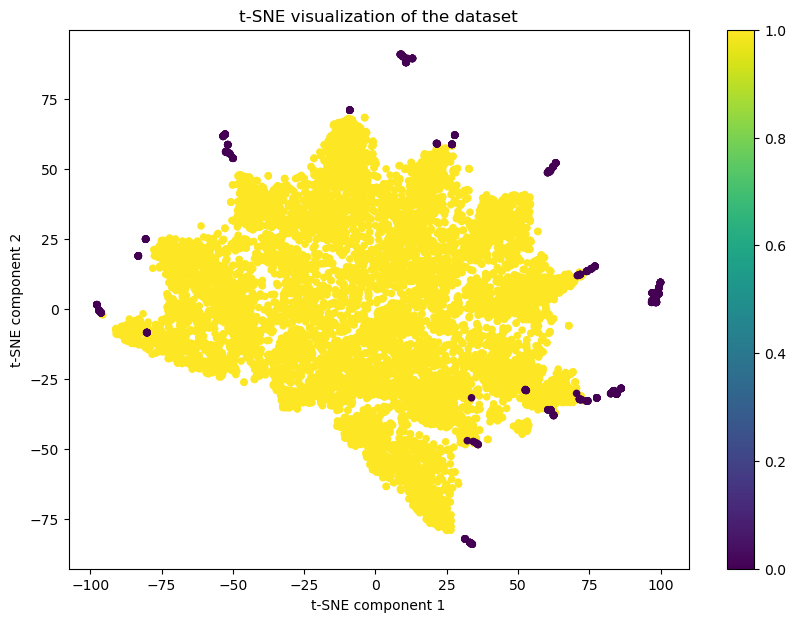

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Load the .npy files
data1 = np.load('var_act_new.npy')
data2 = np.load('var_act_victim_new.npy')
data = np.concatenate((data1,data2),axis=0)
labels = np.zeros(len(data1)+len(data2))
labels[0:len(data1)]= 1
labels[len(data1)+1:(len(data1)+len(data2))]= 0
print(labels)
channel = 42
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data)
# pca_result = pca_result[:,0:2]

tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(data)

# Plot the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = labels, s=20, cmap='viridis')

# Optionally, add labels
# labels = np.random.randint(0, 10, size=number_of_samples)  # Example labels for coloring
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, s=50, cmap='viridis')

plt.title('t-SNE visualization of the dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.colorbar()
plt.show()



In [1]:
from typing import List
def count_increase(depths: List[int]) -> int:
    current_depth = depths[0]
    increase_counter: int = 0
    for depth in depths[1:]:
        if depth > current_depth:
            increase_counter +=1
        current_depth = depth
    return increase_counter
from distutils.core import setup
from Cython.Build import Cythonize

def setup()